# NLP (NATURAL LANGUAGE PROCESSİNG)

## DATA PREPROCESSİNG

-------

In [1]:
import pandas as pd 
import seaborn as sbn 
import matplotlib.pyplot as plt 
import re 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv("C:/ARTIFICIAL INTELLIGENCE/03 - Machine Learning/01 - Resource/Sheet_1.csv")

In [3]:
data = data.iloc[:, [1, 2]]

In [4]:
data.dropna(inplace=True)

In [5]:
data

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


In [6]:
data = pd.concat([data.iloc[:, 1], data.iloc[:, 0]], axis=1)

In [7]:
data

,response_text,class
0,I try and avoid this sort of conflict,not_flagged
1,Had a friend open up to me about his mental ad...,flagged
2,I saved a girl from suicide once. She was goin...,flagged
3,i cant think of one really...i think i may hav...,not_flagged
4,Only really one friend who doesn't fit into th...,not_flagged
...,...,...
75,"Now that I've been through it, although i'm no...",not_flagged
76,when my best friends mom past away from od'ing...,flagged
77,As a camp counselor I provide stability in kid...,not_flagged
78,My now girlfriend used to have serious addicti...,flagged


In [8]:
# data = data[:].values

In [9]:
# data = pd.DataFrame(data=data, index=range(80), columns=["text", "class (1 ==> not_flagged, 0 ==> flagged)"])

In [10]:
data

,response_text,class
0,I try and avoid this sort of conflict,not_flagged
1,Had a friend open up to me about his mental ad...,flagged
2,I saved a girl from suicide once. She was goin...,flagged
3,i cant think of one really...i think i may hav...,not_flagged
4,Only really one friend who doesn't fit into th...,not_flagged
...,...,...
75,"Now that I've been through it, although i'm no...",not_flagged
76,when my best friends mom past away from od'ing...,flagged
77,As a camp counselor I provide stability in kid...,not_flagged
78,My now girlfriend used to have serious addicti...,flagged


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
data.iloc[:, 1] = le.fit_transform(data.iloc[:, 1])

In [14]:
data

,response_text,class
0,I try and avoid this sort of conflict,1
1,Had a friend open up to me about his mental ad...,0
2,I saved a girl from suicide once. She was goin...,0
3,i cant think of one really...i think i may hav...,1
4,Only really one friend who doesn't fit into th...,1
...,...,...
75,"Now that I've been through it, although i'm no...",1
76,when my best friends mom past away from od'ing...,0
77,As a camp counselor I provide stability in kid...,1
78,My now girlfriend used to have serious addicti...,0


<AxesSubplot:xlabel='class', ylabel='count'>

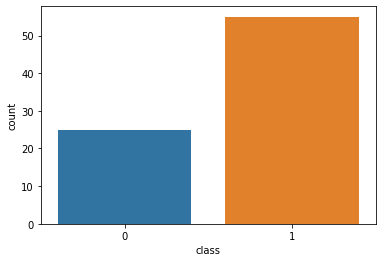

In [15]:
sbn.countplot(x="class", data=data)

In [16]:
ps = PorterStemmer()

In [17]:
derlem = []

In [18]:
for i in range(80):

    comment_ = re.sub("[^a-zA-Z]", " ", str(data.iloc[:, 0][i]))
    comment_ = comment_.lower().split()
    comment_ = [ps.stem(word= word_) for word_ in comment_ if not word_ is set(stopwords.words("english"))]
    comment_ = " ".join(comment_)
    derlem.append(comment_)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer()

In [21]:
x = cv.fit_transform(derlem).toarray()
y = data[["class"]].values

In [22]:
x.shape

(80, 568)

In [60]:
pd.DataFrame(data=x, index=range(80))

,0,1,2,3,4,5,6,7,8,9,...,558,559,560,561,562,563,564,565,566,567
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y.shape

(80, 1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

---------

## NAVIE BAYES

-------------

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()

In [31]:
gnb.fit(x_train_sc, y_train)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [32]:
gnb.predict(x_test_sc)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1])

In [33]:
y_pred = pd.DataFrame(data=gnb.predict(x_test_sc))

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [36]:
cm

array([[ 4,  4],
       [ 7, 12]], dtype=int64)

In [37]:
ac = accuracy_score(y_true=y_test, y_pred=y_pred)

In [38]:
ac

0.5925925925925926

--------

## XGBOOST

In [39]:
from xgboost import XGBClassifier

In [40]:
xgboost = XGBClassifier()

In [41]:
xgboost.fit(x_train_sc, y_train)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[15:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgboost.predict(x_test_sc)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1])

In [43]:
y_pred = pd.DataFrame(data=xgboost.predict(x_test_sc))

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
cm = confusion_matrix(y_pred=y_pred, y_true = y_test)

In [46]:
cm

array([[ 5,  3],
       [ 6, 13]], dtype=int64)

In [47]:
ac = accuracy_score(y_pred=y_pred, y_true = y_test)

In [48]:
ac

0.6666666666666666

------

## DEEP LEARNNİNG

-----------

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping

In [50]:
model = Sequential()

In [51]:
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

In [52]:
model.compile(optimizer= "rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [53]:
earlystopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 25)

In [54]:
model.fit(x=x_train_sc, y=y_train, epochs=1000, validation_data=(x_test_sc, y_test), callbacks=[earlystopping])

Epoch 1/1000
2/2 [==============================] - 14s 7s/step - loss: 0.7313 - accuracy: 0.5983 - val_loss: 0.6593 - val_accuracy: 0.7037
Epoch 2/1000
2/2 [==============================] - 0s 296ms/step - loss: 0.6042 - accuracy: 0.7176 - val_loss: 0.6460 - val_accuracy: 0.7407
Epoch 3/1000
2/2 [==============================] - 0s 264ms/step - loss: 0.5093 - accuracy: 0.8221 - val_loss: 0.6295 - val_accuracy: 0.7037
Epoch 4/1000
2/2 [==============================] - 0s 304ms/step - loss: 0.5225 - accuracy: 0.7679 - val_loss: 0.6162 - val_accuracy: 0.7037
Epoch 5/1000
2/2 [==============================] - 0s 312ms/step - loss: 0.4103 - accuracy: 0.8954 - val_loss: 0.6034 - val_accuracy: 0.7037
Epoch 6/1000
2/2 [==============================] - 0s 288ms/step - loss: 0.3751 - accuracy: 0.8933 - val_loss: 0.5874 - val_accuracy: 0.7037
Epoch 7/1000
2/2 [==============================] - 0s 296ms/step - loss: 0.3319 - accuracy: 0.9037 - val_loss: 0.5780 - val_accuracy: 0.7407
Epoch 8/

In [55]:
graph = pd.DataFrame(model.history.history)

<AxesSubplot:>

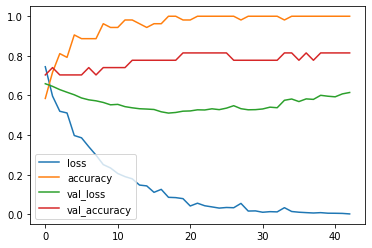

In [56]:
graph.plot()

In [57]:
result = model.evaluate(x_test_sc, y_test)

1/1 [==============================] - 0s 64ms/step - loss: 0.6150 - accuracy: 0.8148


In [58]:
result

[0.6150187253952026, 0.8148148059844971]